<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-1-этапу" data-toc-modified-id="Выводы-по-1-этапу-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по 1 этапу</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-2-этапу" data-toc-modified-id="Выводы-по-2-этапу-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы по 2 этапу</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-3-этапу" data-toc-modified-id="Выводы-по-3-этапу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы по 3 этапу</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-4-этапу" data-toc-modified-id="Выводы-по-4-этапу-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы по 4 этапу</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

# Customer churn

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

________________________________________________________________________________________________________________________________

Customers began to leave Beta-Bank. Every month. A little, but noticeable. Banking marketers figured it was cheaper to keep current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. You are provided with historical data on customer behavior and termination of agreements with the bank.

Build a model with an extremely large *F1*-measure. To pass the project successfully, you need to bring the metric to 0.59. Check the *F1*-measure on the test set yourself.

Additionally measure *AUC-ROC*, compare its value with *F1*-measure.

Data Source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

## Data preparation

In [1]:
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle

In [3]:
churn_data = pd.read_csv('/datasets/Churn.csv')
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
        
check_columns(churn_data)

Уникальные значения столбца RowNumber
[    1     2     3 ...  9998  9999 10000]
Уникальные значения столбца CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Уникальные значения столбца Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Уникальные значения столбца CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 61

In [4]:
churn_data['Tenure'] = churn_data['Tenure'].fillna(0) 
churn_data.isna().mean()#Заменим все NaN из столбца Tenure на 0. Если жилье не указано, скорей всего его нет.

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [4]:
churn_data['Tenure'].value_counts()

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64

Удалим столбецы RowNumber, CustomerId и Surname. Они не нужны при исследовании модели.

RowNumber повторяет индекс датафрейма, CustomerId - случайный или последовательный номер, который никак не зависит от действий пользователя. Surname - фамилия пользователя. Ни один из этих показаетелй не влияет на то, останется клиент или уйдет.

________________________________________________________________________________________________________________________________

Let's remove the RowNumber, CustomerId and Surname columns. They are not needed when exploring the model.

RowNumber repeats the index of the dataframe, CustomerId is a random or sequential number that does not depend on user actions in any way. Surname - the user's last name. None of these metrics affect whether a customer stays or leaves.

In [5]:
churn_data = churn_data.drop(['RowNumber','CustomerId','Surname'], axis=1)
churn_data.shape

(10000, 11)

Создадим датафрейм, созданный по методу прямого кодирования с защитой от дамми-ловушки.

Let's create a dataframe created using the direct encoding method with protection against dummy traps.

In [7]:
ohe_churn_data = pd.get_dummies(churn_data, drop_first=True)
ohe_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


### Выводы по 1 этапу

### Conclusions on stage 1

Данные подготовлены к исследованию.

Были удалены не влияющие на конечный фактор данные, заполнены пропуски в данных.

Data prepared for research.

Data that did not affect the final factor were removed, gaps in the data were filled.

## Исследование задачи

## Problem research

На данном этапе мы будем использовать и сравнивать две модели, наиболее применяемые для решения данного типа задач - Случайный лес и Логистическую регрессию.

At this stage, we will use and compare the two models most used to solve this type of problem - Random Forest and Logistic Regression.

In [8]:
target = ohe_churn_data['Exited']
features = ohe_churn_data.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, 
                                                                              random_state=4125)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.25, 
                                                                              random_state=4125)
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape) #Разобъем данные на выборки.

(7500, 11) (1875, 11) (625, 11)
(7500,) (1875,) (625,)


Проанализируем дисбаланс классов

Let's analyze class imbalance

In [12]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Явно присутствует дисбаланс классов.

Изучим модели без исправление баланса. Начнем со Случайного леса и рассмотрим значение меры F1 при раличном количестве деревьев.

Clearly there is a class imbalance.

Let's study models without balance correction. Let's start with a Random Forest and consider the value of the measure F1 for a different number of trees.

In [7]:
%%time

for estimator in range(50, 300, 10):
    model =  RandomForestClassifier(random_state=20052020, n_estimators=estimator)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Количество деревьев', estimator,'F1', f1_score(target_valid, predicted_valid))

Количество деревьев 50 F1 0.6033333333333334
Количество деревьев 60 F1 0.609271523178808
Количество деревьев 70 F1 0.609271523178808
Количество деревьев 80 F1 0.6135986733001658
Количество деревьев 90 F1 0.6135986733001658
Количество деревьев 100 F1 0.6179401993355481
Количество деревьев 110 F1 0.616144975288303
Количество деревьев 120 F1 0.6125827814569536
Количество деревьев 130 F1 0.609271523178808
Количество деревьев 140 F1 0.6125827814569536
Количество деревьев 150 F1 0.609271523178808
Количество деревьев 160 F1 0.6029654036243822
Количество деревьев 170 F1 0.6153846153846154
Количество деревьев 180 F1 0.611842105263158
Количество деревьев 190 F1 0.6059602649006622
Количество деревьев 200 F1 0.6085526315789473
Количество деревьев 210 F1 0.6075533661740558
Количество деревьев 220 F1 0.6108374384236454
Количество деревьев 230 F1 0.6042692939244664
Количество деревьев 240 F1 0.6032786885245901
Количество деревьев 250 F1 0.6
Количество деревьев 260 F1 0.6062602965403624
Количество дер

Лучший результат был получен в районе 100-110 деревьев. Проведем исследование с шагом 1.

The best result was obtained in the region of 100-110 trees. Let's explore step 1.

In [22]:
%%time

for estimator in range(90, 115, 1):
    model =  RandomForestClassifier(random_state=20052020, n_estimators=estimator)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Количество деревьев', estimator,'F1', f1_score(target_valid, predicted_valid))

Количество деревьев 90 F1 0.6135986733001658
Количество деревьев 91 F1 0.6141215106732348
Количество деревьев 92 F1 0.6146179401993355
Количество деревьев 93 F1 0.611842105263158
Количество деревьев 94 F1 0.609271523178808
Количество деревьев 95 F1 0.612850082372323
Количество деревьев 96 F1 0.6123128119800333
Количество деревьев 97 F1 0.6171617161716172
Количество деревьев 98 F1 0.6158940397350994
Количество деревьев 99 F1 0.6171617161716172
Количество деревьев 100 F1 0.6179401993355481
Количество деревьев 101 F1 0.6181818181818183
Количество деревьев 102 F1 0.6112956810631229
Количество деревьев 103 F1 0.6115702479338844
Количество деревьев 104 F1 0.6112956810631229
Количество деревьев 105 F1 0.609271523178808
Количество деревьев 106 F1 0.6112956810631229
Количество деревьев 107 F1 0.6108374384236454
Количество деревьев 108 F1 0.6138613861386139
Количество деревьев 109 F1 0.6141215106732348
Количество деревьев 110 F1 0.616144975288303
Количество деревьев 111 F1 0.6141215106732348
Кол

Лучший результат по гиперпараметру n_estimators достигнут на 97.

Исследуем, как работает Логистическая регрессия на этих данных.

The best result for the n_estimators hyperparameter was achieved at 97.

Let's explore how Logistic Regression works on this data.

In [23]:
%%time

model =  LogisticRegression(random_state=20222022, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1', f1_score(target_valid, predicted_valid))

F1 0.10096153846153846
CPU times: user 46.6 ms, sys: 16 ms, total: 62.6 ms
Wall time: 35.7 ms


Проведем оценку accuracy (попадание по классам), precision (точность) и recall (полнота), также покажем F-метрику.

We will evaluate accuracy (hit by class), precision (accuracy) and recall (completeness), we will also show the F-metric.

In [24]:
%%time

model = RandomForestClassifier(random_state=20222020, n_estimators=53)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20222020, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Случайный лес
Точность попадания по классам 0.8736
Точность 0.7695473251028807
Полнота 0.5081521739130435
F1 0.6121112929623567

Логистическая регрессия
Точность попадания по классам 0.8005333333333333
Точность 0.4375
Полнота 0.057065217391304345
F1 0.10096153846153846

CPU times: user 528 ms, sys: 39.9 ms, total: 568 ms
Wall time: 563 ms


Проведем построение ROC-кривой для каждой модели. И выведем показатель AUC-ROC.

Let's build a ROC-curve for each model. And we will display the AUC-ROC indicator.

AUC-ROC Модель случайного леса 0.8541642624275122
AUC-ROC Логистическая регрессия 0.6884791263956609


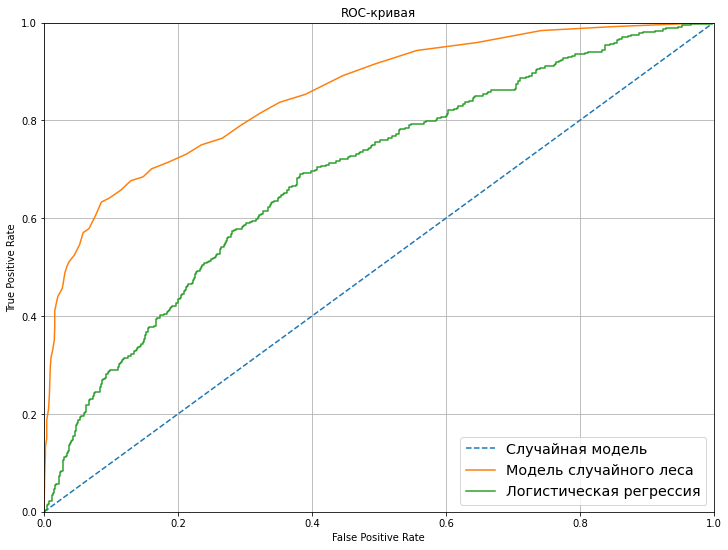

In [8]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

model = RandomForestClassifier(random_state=20052020, n_estimators=53)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Модель случайного леса',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса')

model = LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Логистическая регрессия',auc_roc)
plt.plot(fpr, tpr, label='Логистическая регрессия')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.grid(True)
plt.show()

### Выводы по 2 этапу

### Conclusions on stage 2

В данных сущестует дисбаланс классов, возможно он влияет на качество изучаемых моделей.

Все модели имеют recall (полноту) ниже, чем percision (точность), из-за несбалансированности данных, что влияет на показатель F-меры.

There is an imbalance of classes in the data, perhaps it affects the quality of the studied models.

All models have lower recall than percision due to data imbalance, which affects the F-measure.

## Борьба с дисбалансом

## Struggling with imbalance

Для борьбы с дисбалансом выполним сравнение моделей:

 - С взвешенными классами
 - С уменьшенной выборкой
 - С увеличенной выборкой

Изучим возможности моделей по взвешиванию классов.

________________________________________________________________________________________________________________________________

To combat the imbalance, let's compare the models:

  - With weighted classes
  - With reduced selection
  - With increased selection

Let's study the possibilities of models for class weighting.

In [9]:
%%time

model = RandomForestClassifier(random_state=20222022, n_estimators=53, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20222022, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Случайный лес
Точность попадания по классам 0.8677333333333334
Точность 0.7727272727272727
Полнота 0.46195652173913043
F1 0.5782312925170068

Логистическая регрессия
Точность попадания по классам 0.7056
Точность 0.37186629526462395
Полнота 0.7255434782608695
F1 0.4917127071823204

CPU times: user 580 ms, sys: 78.6 ms, total: 659 ms
Wall time: 593 ms


F-мера несколько снизилась у модели случайного леса, но значительно выросла у логистической регресии.

Исследуем способ уменьшения значений класса 0.

The F-score decreased slightly for the random forest model, but increased significantly for the logistic regression.

Let's explore a way to reduce class 0 values.

In [10]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=20222022)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=20222022)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=20222022)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

1    1549
0    1488
Name: Exited, dtype: int64


In [11]:
%%time

model = RandomForestClassifier(random_state=20222022, n_estimators=53)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20222022, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Случайный лес
Точность попадания по классам 0.7696
Точность 0.44952681388012616
Полнота 0.7744565217391305
F1 0.5688622754491017

Логистическая регрессия
Точность попадания по классам 0.6581333333333333
Точность 0.3300124533001245
Полнота 0.720108695652174
F1 0.45260461144321096

CPU times: user 336 ms, sys: 65 ms, total: 401 ms
Wall time: 385 ms


Показатели F-меры обеих моделей снизились.

Исследуем методы увеличения класса 1.

The F-measures of both models decreased.

Let's explore methods for increasing class 1.

In [12]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=20222022)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

1    6196
0    5951
Name: Exited, dtype: int64


In [28]:
%%time

model = RandomForestClassifier(random_state=20222022, n_estimators=53)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20222022, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Точность', precision_score(target_valid, predicted_valid))
print('Полнота', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Случайный лес
Точность попадания по классам 0.8581333333333333
Точность 0.659375
Полнота 0.5733695652173914
F1 0.6133720930232558

Логистическая регрессия
Точность попадания по классам 0.6602666666666667
Точность 0.33250311332503113
Полнота 0.7255434782608695
F1 0.45602049530315963

CPU times: user 680 ms, sys: 47.9 ms, total: 728 ms
Wall time: 727 ms


F-мера стала лучше у модели случайного леса по сравнению с дисбалансными данными. 

Лучшей моделью по F-мера стала модель случайного леса с тренировочными данными, где увеличен класс 1.

Выведем ROC-кривую и AUC-ROC для посленнего измененного баланса.

________________________________________________________________________________________________________________________________

The F-measure is better for the random forest model than for the imbalanced data.

The best model in terms of F-measure was the random forest model with training data, where class 1 was increased.

Derive the ROC-curve and AUC-ROC for the last modified balance.

AUC-ROC Модель случайного леса 0.8432523224950232
AUC-ROC Логистическая регрессия 0.738845532442803


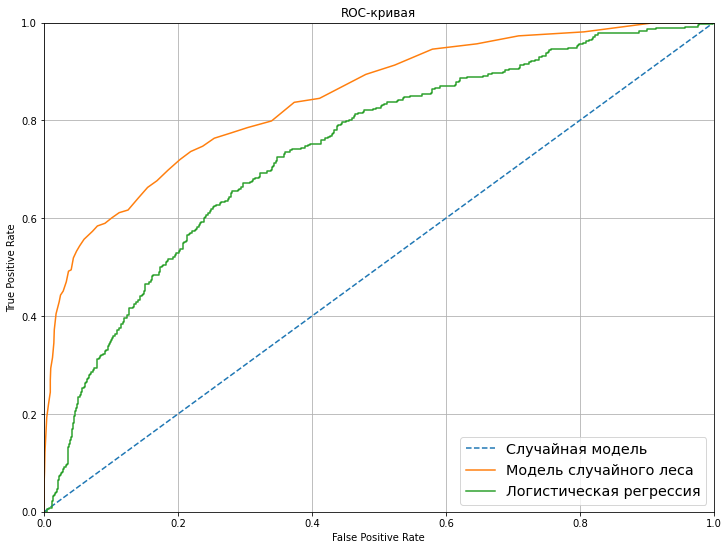

In [13]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

model = RandomForestClassifier(random_state=20222022, n_estimators=53)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Модель случайного леса',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса')

model = LogisticRegression(random_state=20222022, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC Логистическая регрессия',auc_roc)
plt.plot(fpr, tpr, label='Логистическая регрессия')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.grid(True)
plt.show()

### Выводы по 3 этапу

### Conclusions on the 3rd stage

Дисбаланс повлиял на модели в худшую сторону. Лучшим решением стало увеличение классов 1 в тренировочной выборке.

The imbalance affected the models for the worse. The best solution was to increase classes 1 in the training sample.


## Тестирование модели

## Model testing

К тестовой выборке примем модель случайного леса. Исследуем гиперпараметры на следующих четырех моделях: на дисбалансных данных и сбалансированных: со взвешенными классами, усечением 0 класса и расширением класса 1 и определим F-меру моделей.

Let's take a random forest model for the test sample. We investigate hyperparameters on the following four models: on unbalanced data and balanced: with weighted classes, class truncation 0 and class 1 extension, and determine the F-measure of the models.

In [ ]:
%%time

best_params = None
best_result = 0

for params in tqdm(itertools.product(range(1, 200), range(1, 500), range(1, 12), range(1, 11))):
    depth, est, min_s_1, samples_split = params
    model = RandomForestClassifier(random_state=20052020, n_estimators=est, max_depth = depth, 
                                    min_samples_leaf = min_s_1, min_samples_split=samples_split/10)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_params = params
        best_result = result
        
print(f'F1-score of the best model {np.round(best_result, 5)}')
print(f'\nParams:\nmax_depth = {best_params[0]}\nn_estimators = {best_params[1]}\nmin_samples_leaf = {best_params[2]}\nmin_samples_split = {best_params[3]}')

In [ ]:
%%time

best_params = None
best_result = 0

for params in tqdm(itertools.product(range(1, 200), range(1, 500), range(1, 12), range(1, 11))):
    depth, est, min_s_1 = params
    model = RandomForestClassifier(random_state=20052020, n_estimators=est, max_depth = depth, 
                                    min_samples_leaf = min_s_1, min_samples_split=samples_split/10, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_params = params
        best_result = result
        
print(f'F1-score of the best model {np.round(best_result, 5)}')
print(f'\nParams:\nmax_depth = {best_params[0]}\nn_estimators = {best_params[1]}\nmin_samples_leaf = {best_params[2]}\nmin_samples_split = {best_params[3]}')

In [ ]:
%%time

best_params = None
best_result = 0

for params in tqdm(itertools.product(range(1, 200), range(1, 500), range(1, 12), range(1, 11))):
    depth, est, min_s_1 = params
    model = RandomForestClassifier(random_state=20052020, n_estimators=est, max_depth = depth, 
                                    min_samples_leaf = min_s_1, min_samples_split=samples_split/10)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_params = params
        best_result = result
        
print(f'F1-score of the best model {np.round(best_result, 5)}')
print(f'\nParams:\nmax_depth = {best_params[0]}\nn_estimators = {best_params[1]}\nmin_samples_leaf = {best_params[2]}\nmin_samples_split = {best_params[3]}')

In [ ]:
%%time

best_params = None
best_result = 0

for params in tqdm(itertools.product(range(1, 200), range(1, 500), range(1, 12), range(1, 11))):
    depth, est, min_s_1 = params
    model = RandomForestClassifier(random_state=20052020, n_estimators=est, max_depth = depth, 
                                    min_samples_leaf = min_s_1, min_samples_split=samples_split/10)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_params = params
        best_result = result
        
print(f'F1-score of the best model {np.round(best_result, 5)}')
print(f'\nParams:\nmax_depth = {best_params[0]}\nn_estimators = {best_params[1]}\nmin_samples_leaf = {best_params[2]}\nmin_samples_split = {best_params[3]}')

Лучший (Best) показатель F1 для модели на дисбалансных данных для получен при n_estimators=378, max_depth=16, min_samples_leaf=7,  min_samples_split=5.

Лучший показатель F1 для модели со взвешенными классам для получен при n_estimators=236, max_depth=14, min_samples_leaf=5, min_samples_split=4.

Лучший показатель F1 для модели с уменьшенным количеством классов 0 для получен при n_estimators=174, max_depth=11, min_samples_leaf=2,  min_samples_split=8.

Лучший показатель F1 для модели с увеличенным количеством классов 1 для получен при n_estimators=68, max_depth=14, min_samples_leaf=3, min_samples_split=4.

Проверим на тестовой выборке данные четыре модели: на дисбалансных данных и сбалансированных: со взвешенными классами, усечением 0 класса и расширением класса 1.

Let's check these four models on a test sample: on unbalanced data and balanced ones: with weighted classes, truncation of class 0 and extension of class 1.

In [22]:
model = RandomForestClassifier(random_state=20052020, n_estimators=378, max_depth=16,
                                   min_samples_leaf=7,  min_samples_split=5)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - дисбаланс классов')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Точноть', precision_score(target_test, predicted_test))
print('Полнота', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=236, max_depth=14,
                                   min_samples_leaf=5, min_samples_split=4, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - взвешенные классы')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Точноть', precision_score(target_test, predicted_test))
print('Полнота', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=174, max_depth=11,
                                   min_samples_leaf=2,  min_samples_split=8)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - уменьшенное количество классов 0')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Точноть', precision_score(target_test, predicted_test))
print('Полнота', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=68, max_depth=14,
                                   min_samples_leaf=3, min_samples_split=4)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - увеличенное количество классов 1')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Точноть', precision_score(target_test, predicted_test))
print('Полнота', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Случайный лес - дисбаланс классов
Точность попадания по классам 0.8672
Точноть 0.8245614035087719
Полнота 0.39166666666666666
F1 0.5310734463276836

Случайный лес - взвешенные классы
Точность попадания по классам 0.8496
Точноть 0.6065573770491803
Полнота 0.6166666666666667
F1 0.6115702479338844

Случайный лес - уменьшенное количество классов 0
Точность попадания по классам 0.8032
Точноть 0.4918918918918919
Полнота 0.7583333333333333
F1 0.5967213114754099

Случайный лес - увеличенное количество классов 1
Точность попадания по классам 0.8304
Точноть 0.5514705882352942
Полнота 0.625
F1 0.5859375000000001



AUC-ROC Модель случайного леса - дисбаланс классов 0.8532673267326732
AUC-ROC Модель случайного леса - взвешенные классы 0.8515016501650164
AUC-ROC Модель случайного леса - уменьшенное количество классов 0 0.8539933993399339
AUC-ROC Модель случайного леса - увеличенное количество классов 1 0.8495709570957096


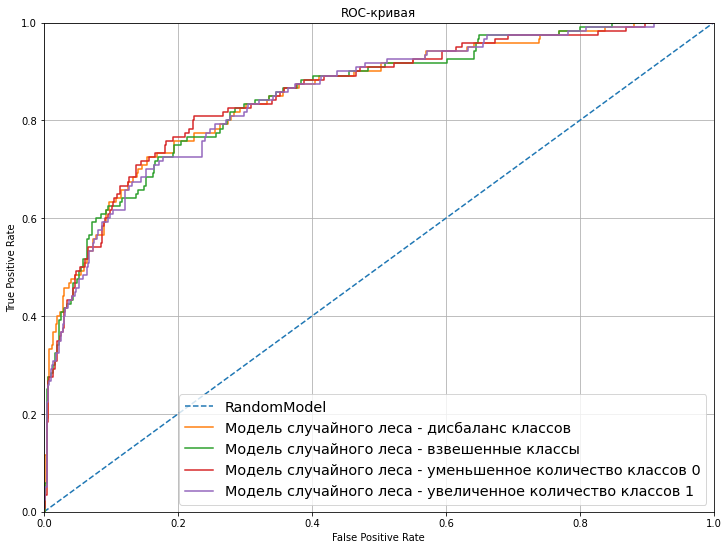

In [23]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')


model = RandomForestClassifier(random_state=20052020, n_estimators=378, max_depth=16,
                                   min_samples_leaf=7,  min_samples_split=5)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Модель случайного леса - дисбаланс классов',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса - дисбаланс классов')

model = RandomForestClassifier(random_state=20052020, n_estimators=236, max_depth=14,
                                   min_samples_leaf=5, min_samples_split=4, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Модель случайного леса - взвешенные классы',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса - взвешенные классы')

model = RandomForestClassifier(random_state=20052020, n_estimators=174, max_depth=11,
                                   min_samples_leaf=2,  min_samples_split=8)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Модель случайного леса - уменьшенное количество классов 0',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса - уменьшенное количество классов 0')

model = RandomForestClassifier(random_state=20052020, n_estimators=68, max_depth=14,
                                   min_samples_leaf=3, min_samples_split=4)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC Модель случайного леса - увеличенное количество классов 1',auc_roc)
plt.plot(fpr, tpr, label='Модель случайного леса - увеличенное количество классов 1')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.grid(True)
plt.show()

### Выводы по 4 этапу

### Conclusions on stage 4

2 из 4 моделей достигли максимального значения F-меры на тестовых данных: модель случайного леса со взвешенными классами и модель с уменьшенным количеством классов 0.

Видно, что подход взвешенных классов дает результат лучше для данного набора данных. Percision падает, recall растет, и в целом F-мера имеет небольшой прирост. Баланс классов повышает охват необходимых данных.

Оценивая адеватность модели можно заметить, что AUC-ROC модели с уменьшенным количеством классов 0 и взвешенными классами наилучшим образом предсказывают вероятность ухода клиента.

В результате исследования была получена модель с лучшими показателями как по F1-мере, так и по AUC-ROC - Случайный лес со взвешенными классами.

________________________________________________________________________________________________________________________________

2 out of 4 models reached the maximum F-measure on the test data: a class-weighted random forest model and a class-reduced model of 0.

It can be seen that the weighted classes approach gives a better result for this data set. Percision is falling, recall is growing, and in general, the F-measure has a small increase. The balance of classes increases the coverage of the required data.

Assessing the adequacy of the model, it can be seen that AUC-ROC models with a reduced number of classes of 0 and weighted classes are the best at predicting the probability of a client leaving.

As a result of the study, a model was obtained with the best performance both in F1-measure and in AUC-ROC - Random Forest with Weighted Classes.

## Итоговый вывод

## Final output

При работе с проектом было выполнено:

 - Изучены данные. Разбиты данные на тренировочную, валидационную и тестовую выборку.
 - Исследована задача. Проверены модели на данных без изменений.
 - Скоректирован балланс класса. Изменен вес класса.
 - Получена улучшенная модель. Проведен поиск гиперпараметров.
 - Проведен финальный тест.
 
Обученная модель случайного леса со взвешенными классами имеет достаточную адекватность, подтвержденная ее значением AUC-ROC = 0.852. Это значительно лучше, чем случайная модель предсказывания (AUC-ROC = 0.5). Точность попадания по классам 0.834, точность 0.606, полнота 0.641 и значение F1 0.623. Модель старается собрать больше данных, чем показать верную точность (recall > precision). Процент попадания в классы достаточно высокий.

________________________________________________________________________________________________________________________________

When working with the project, the following was done:

  - Studied the data. The data is divided into training, validation and test sets.
  - Researched task. Checked the models on the data without changes.
  - Adjusted class balance. Changed class weight.
  - Improved model received. A search for hyperparameters was carried out.
  - Passed the final test.
 
The trained class-weighted random forest model has sufficient adequacy, confirmed by its AUC-ROC value of 0.852. This is significantly better than the random predictive model (AUC-ROC = 0.5). Class hit accuracy 0.834, accuracy 0.606, recall 0.641 and F1 value 0.623. The model tries to collect more data than it shows the correct accuracy (recall > precision). The percentage of getting into the classes is quite high.